In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import sqrt
warnings.filterwarnings('ignore')

## <center><b>Data Cleaning</b></center>

In [2]:
df=pd.read_excel('innercity.xlsx')
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [4]:
df.shape

(21613, 23)

In [5]:
print(f'total percentage of null value : {int(df.isnull().sum().sum()*100/df.shape[0])}')
df.isnull().sum()

total percentage of null value : 3


cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df=df.dropna(axis=0,inplace=False)
df.drop(['cid'],axis=1,inplace=True)

In [8]:
df_1=df.copy()
df_1.head()

,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [9]:
df_1.shape

(21387, 22)

In [10]:
df_1['dayhours'] = pd.to_datetime(df_1.dayhours)
print(f"Categorical  columns : >>{df_1.select_dtypes('object').columns.values}")
df_1.select_dtypes('object').describe()

Categorical  columns : >>['ceil' 'coast' 'condition' 'yr_built' 'long' 'total_area']


,ceil,coast,condition,yr_built,long,total_area
count,21387,21387,21387,21387,21387.00,21387
unique,7,3,5,116,753.00,11094
top,1,0,3,2014,-122.29,$
freq,10547,21197,13881,554,115.00,39


In [11]:
print('Length of Data Rows Haviing $ sign : ',len(set(np.where(df_1=='$')[0])))

Length of Data Rows Haviing $ sign :  99


In [12]:
for i in df_1.select_dtypes('object').columns :
  df_1 = df_1.iloc[np.where(df_1[i]!='$')[0]]
df_1.shape

(21288, 22)

In [13]:
df_1['ceil']=df_1['ceil'].astype('category')
df_1['coast']=df_1['coast'].astype('category')
df_1['condition']=df_1['condition']	.astype('category')
df_1['total_area']=df_1['total_area'].astype('int')
df_1['long']=df_1['long'].astype(float)
df_1['yr_built']=df_1['yr_built'].astype('int')
current_year = datetime.datetime.now().year
df_1['house_age']=current_year-df_1['yr_built']

### <center> Outlier removed </center>

In [14]:
df_1.columns

Index(['dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'house_age'],
      dtype='object')

In [15]:
Q1 = df_1['price'].quantile(0.25)
Q3 = df_1['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print('Q3 : ',Q3,'\tQ1 : ',Q1)
print(f'IQR : {IQR}')
print(f'lower_range : {lower}\nhigh_range : {upper}')

Q3 :  645000.0 	Q1 :  321020.25
IQR : 323979.75
lower_range : -164949.375
high_range : 1130969.625


In [16]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = df_1[df_1['price']>=upper].index
lower_array = df_1[df_1['price']<=lower].index
print(upper_array.shape,lower_array.shape)

# Removing the outliers
df2 = df_1.drop(index=upper_array, inplace=False,axis=1)
df2 = df2.drop(index=lower_array, inplace=False,axis=1)

df2.to_excel('cleaned_innercity.xlsx')
# Print the new shape of the DataFrame
print("old Shape: ", df_1.shape)
print("New Shape: ", df2.shape)

(1123,) (0,)
old Shape:  (21288, 23)
New Shape:  (20165, 23)


## <center><b>Data Visualization</b></center>

In [17]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import sqrt
warnings.filterwarnings('ignore')

In [18]:
clean = pd.read_excel('cleaned_innercity.xlsx',index_col=0)
clean.head()

,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,house_age
0,2015-04-27,600000,4,1.75,3050,9440,1.0,0,0,3,...,1966,0,98034,47.7228,-122.183,2020,8660,0,12490,57
1,2015-03-17,190000,2,1.00,670,3101,1.0,0,0,4,...,1948,0,98118,47.5546,-122.274,1660,4100,0,3771,75
2,2014-08-20,735000,4,2.75,3040,2415,2.0,1,4,3,...,1966,0,98118,47.5188,-122.256,2620,2433,0,5455,57
3,2014-10-10,257000,3,2.50,1740,3721,2.0,0,0,3,...,2009,0,98002,47.3363,-122.213,2030,3794,0,5461,14
4,2015-02-18,450000,2,1.00,1120,4590,1.0,0,0,3,...,1924,0,98118,47.5663,-122.285,1120,5100,0,5710,99


In [19]:
clean.nunique()

dayhours              371
price                3419
room_bed               13
room_bath              26
living_measure        898
lot_measure          9197
ceil                    6
coast                   2
sight                   5
condition               5
quality                11
ceil_measure          839
basement              270
yr_built              116
yr_renovated           70
zipcode                70
lat                  5004
long                  750
living_measure15      719
lot_measure15        8133
furnished               2
total_area          10470
house_age             116
dtype: int64

### <center>*Categorical Variable*</center>

In [20]:
print(clean['coast'].value_counts())

0    20105
1       60
Name: coast, dtype: int64


In [21]:
print('avg price for house with water front : ',int(clean[clean['coast']==1]['price'].mean()))
print('avg price for house without water front : ',int(clean[clean['coast']==0]['price'].mean()))

avg price for house with water front :  667774
avg price for house without water front :  476550


<Axes: xlabel='condition', ylabel='Density'>

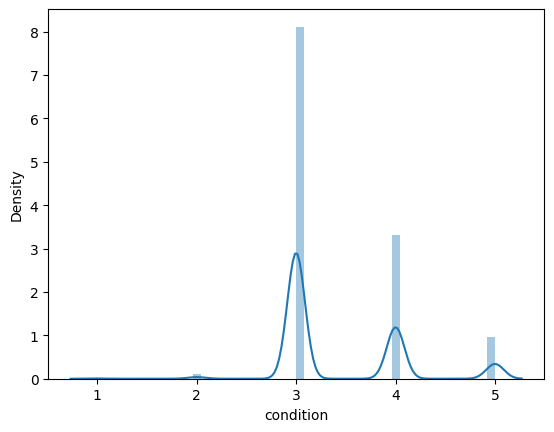

In [22]:
sns.distplot(clean['condition'])

<Axes: xlabel='quality', ylabel='Density'>

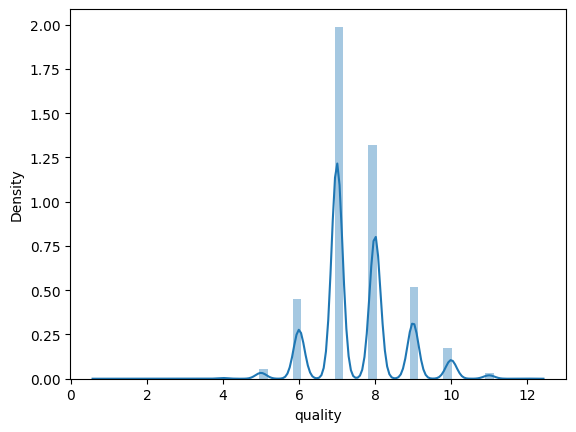

In [23]:
sns.distplot(clean['quality'])

<Axes: xlabel='room_bath', ylabel='Density'>

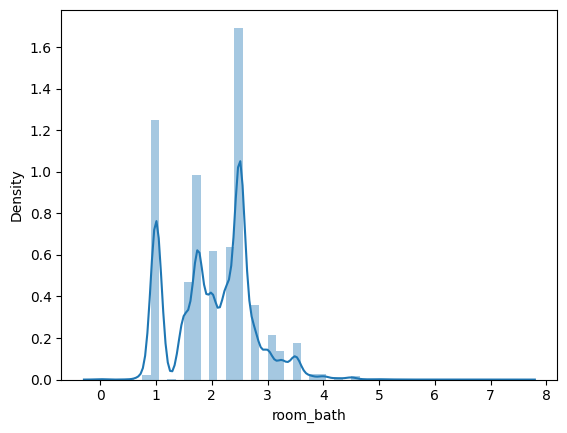

In [24]:
sns.distplot(clean['room_bath'])

[]

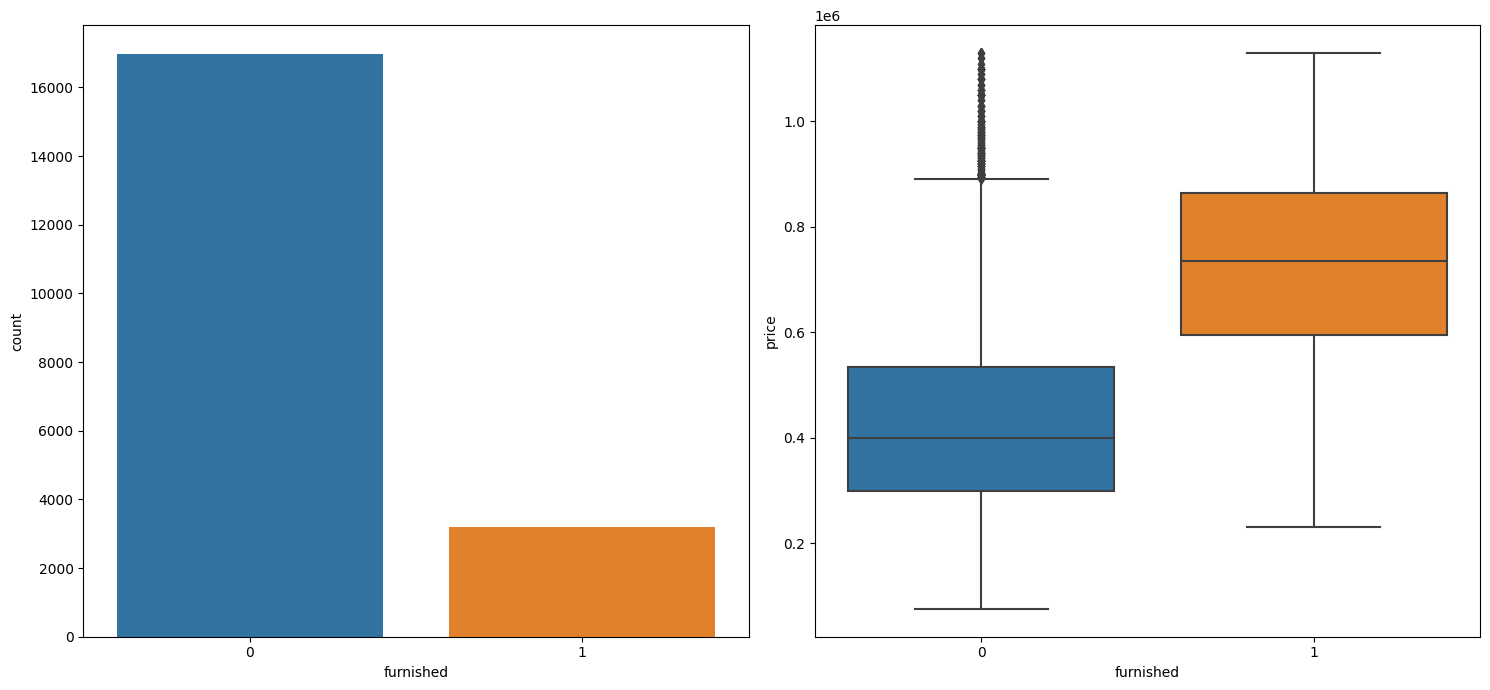

In [25]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(data=clean,x='furnished')
plt.subplot(1,2,2)
sns.boxplot(data=clean,x='furnished',y='price')
plt.tight_layout()
plt.plot()

[]

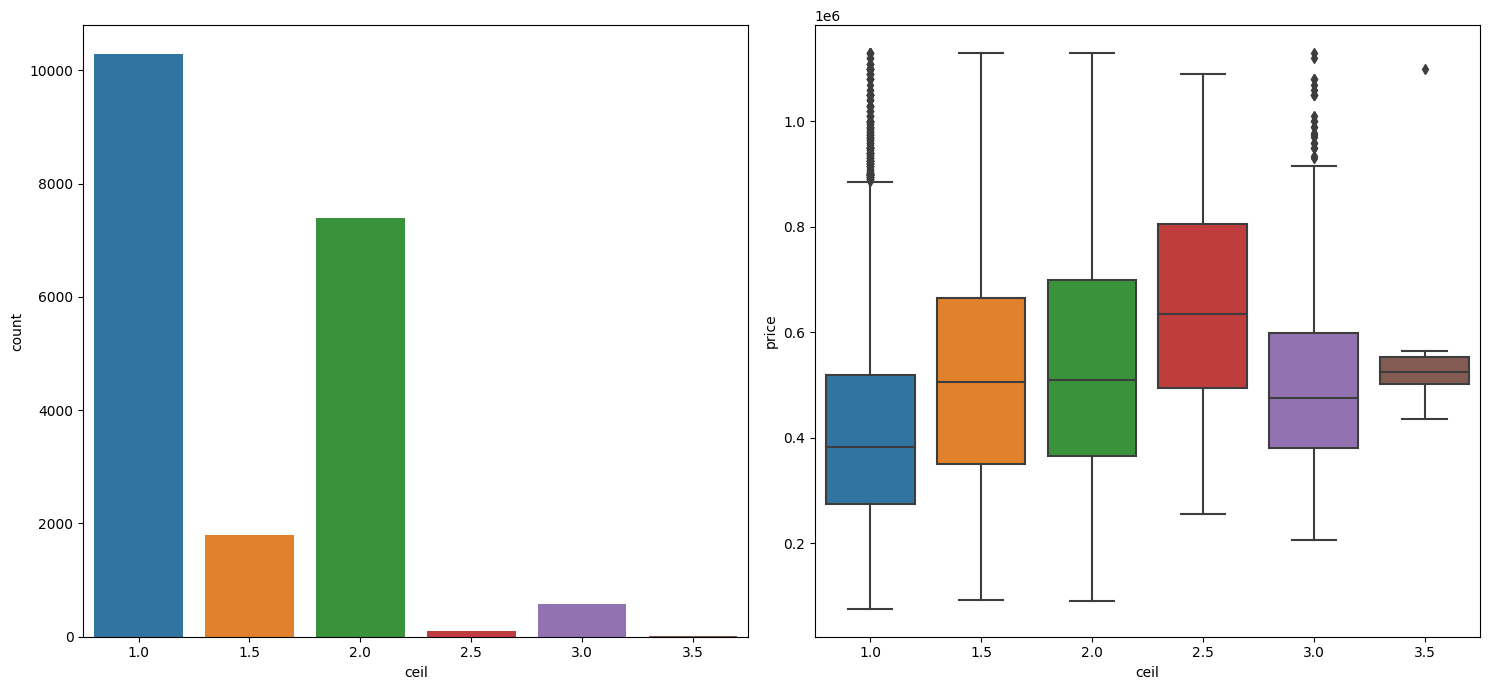

In [26]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(data=clean,x='ceil')
plt.subplot(1,2,2)
sns.boxplot(data=clean,x='ceil',y='price')
plt.tight_layout()
plt.plot()

[]

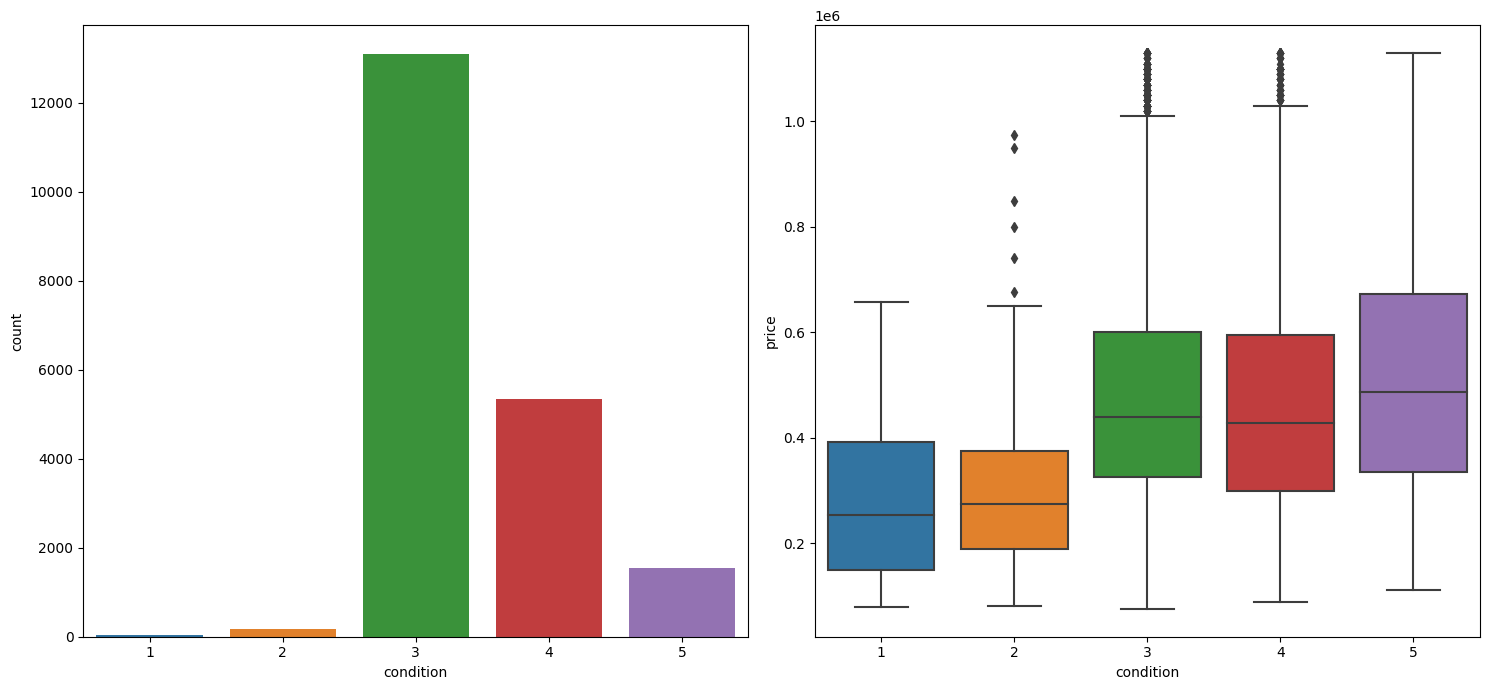

In [27]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(data=clean,x='condition')
plt.subplot(1,2,2)
sns.boxplot(data=clean,x='condition',y='price')
plt.tight_layout()
plt.plot()

[]

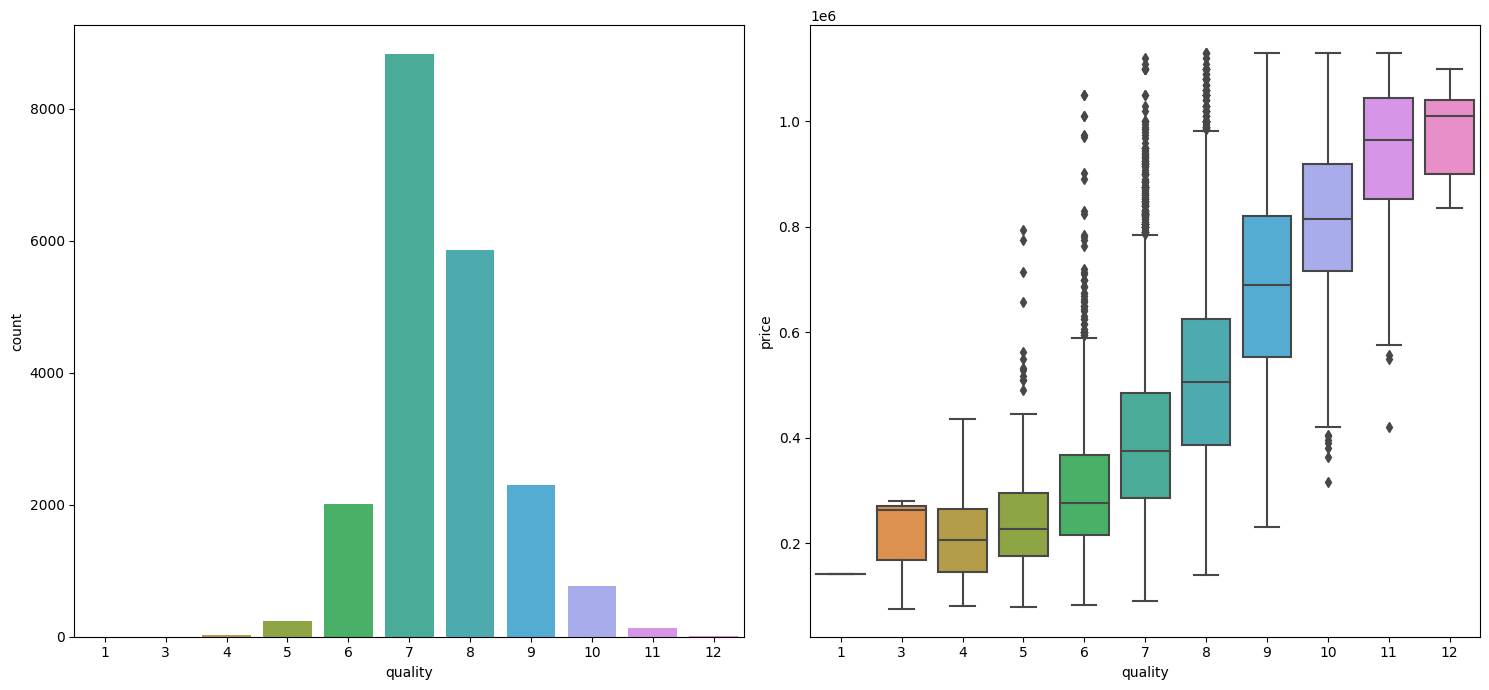

In [28]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(data=clean,x='quality')
plt.subplot(1,2,2)
sns.boxplot(data=clean,x='quality',y='price')
plt.tight_layout()
plt.plot()

[]

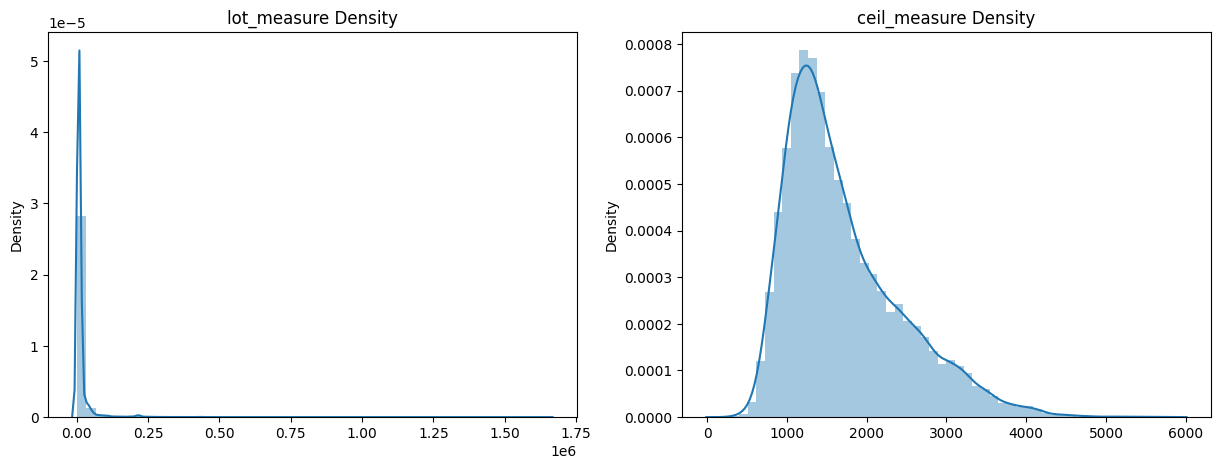

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(x=clean.lot_measure)
plt.title('lot_measure Density')
plt.subplot(1,2,2)
sns.distplot(x=clean.ceil_measure)
plt.title('ceil_measure Density')
plt.plot()

[]

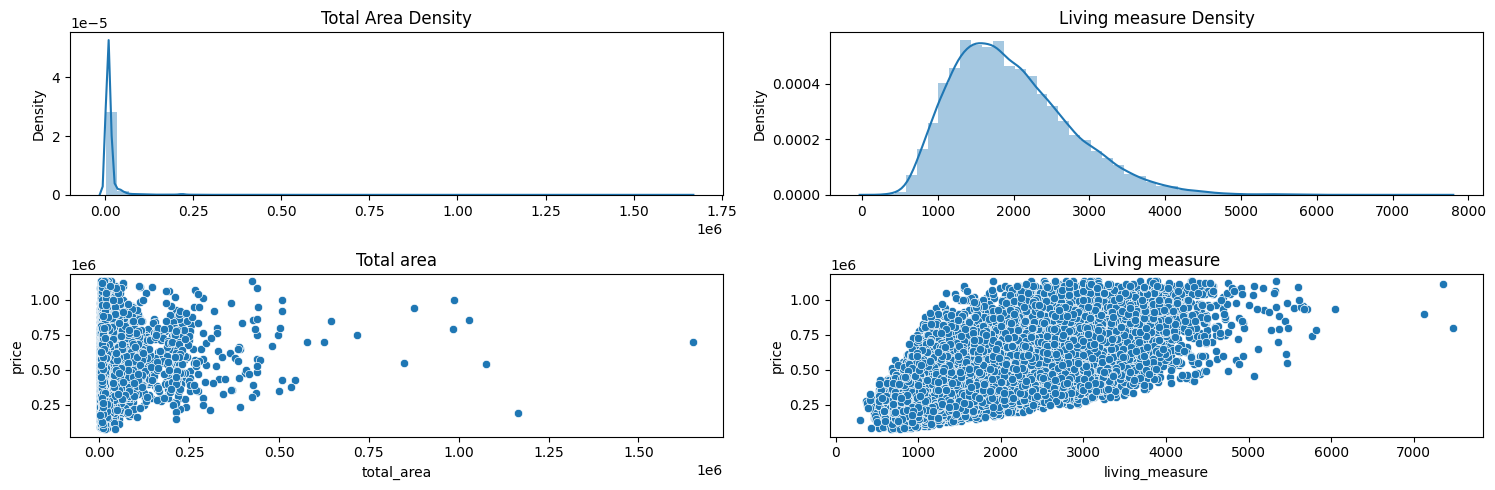

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.distplot(x=clean.total_area)
plt.title('Total Area Density')
plt.subplot(2,2,2)
sns.distplot(x=clean.living_measure)
plt.title('Living measure Density')

plt.subplot(2,2,3)
sns.scatterplot(x=clean.total_area,y=clean.price)
plt.title('Total area')
plt.subplot(2,2,4)
sns.scatterplot(x=clean.living_measure,y=clean.price)
plt.title('Living measure')
plt.tight_layout()
plt.plot()

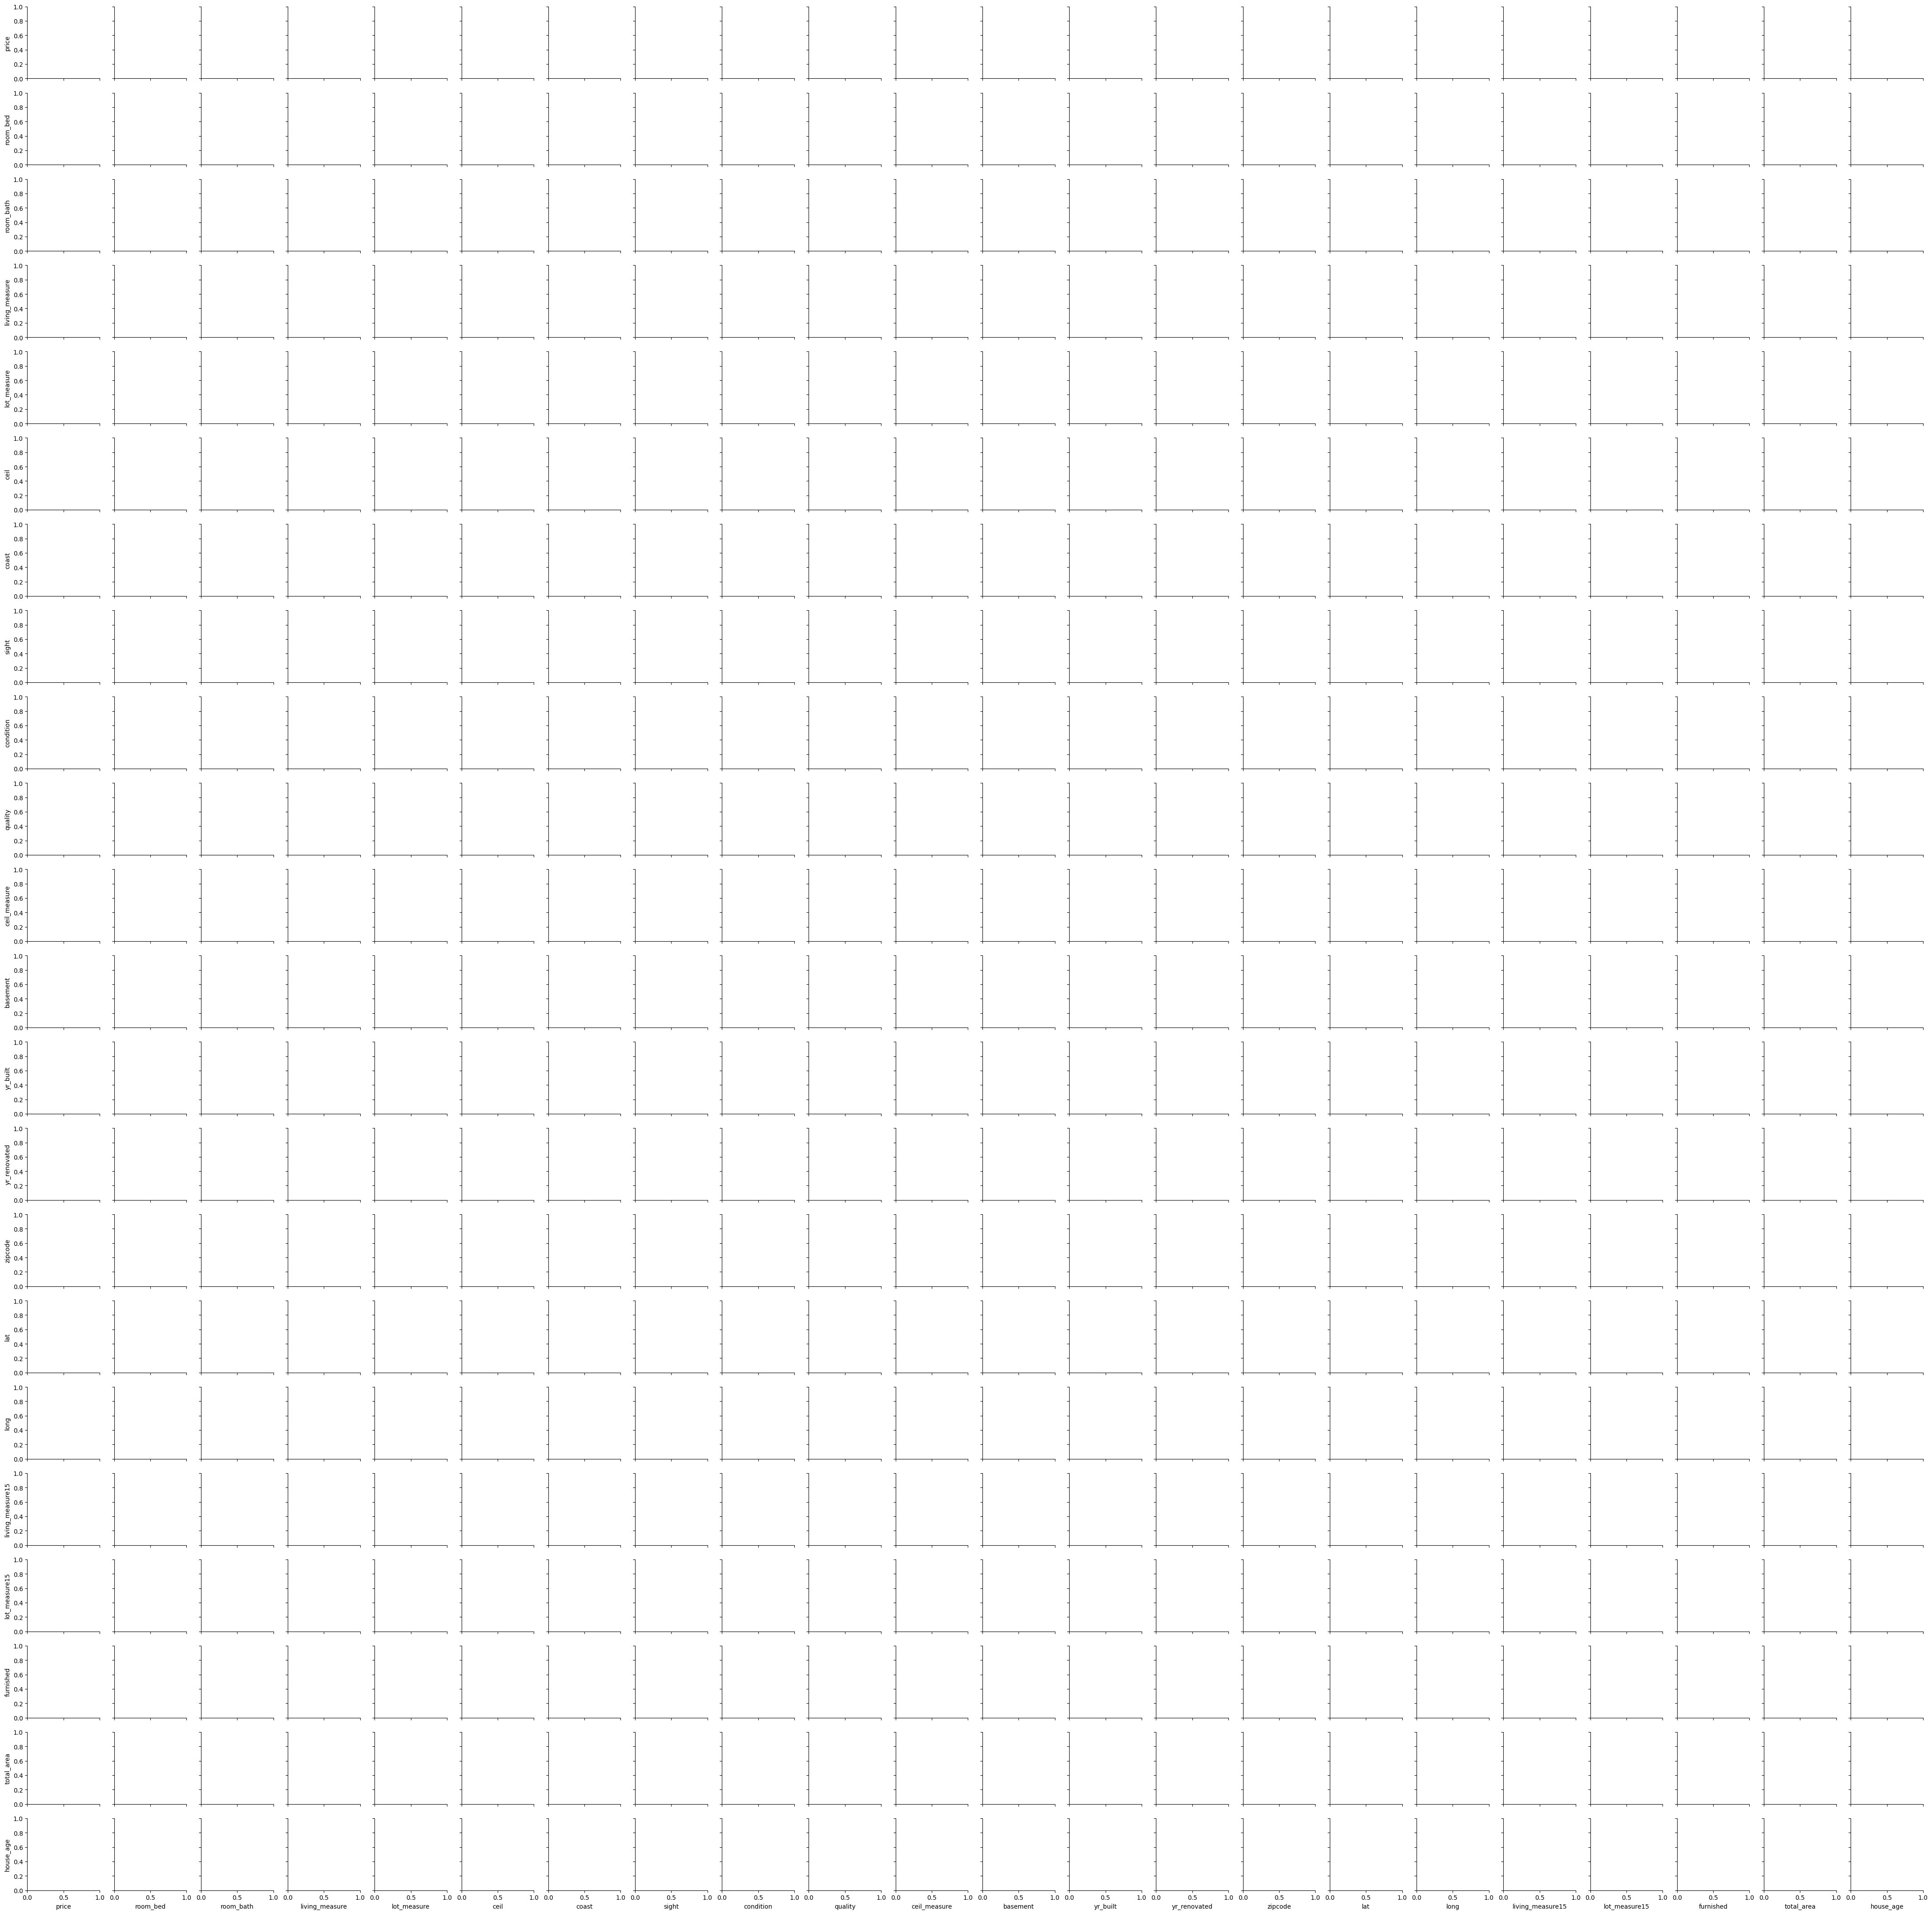

In [31]:
sns.pairplot(clean)

## <center><b>Feature selection</b></center>

In [34]:
clean = pd.read_excel('cleaned_innercity.xlsx',index_col=0)

In [35]:
clean.corr()['price'].sort_values(ascending=False)

price               1.000000
quality             0.632148
living_measure      0.622717
living_measure15    0.563641
ceil_measure        0.531949
furnished           0.522929
room_bath           0.455761
lat                 0.429518
room_bed            0.296359
ceil                0.273800
sight               0.238015
basement            0.233620
total_area          0.106052
lot_measure         0.094376
lot_measure15       0.083106
yr_renovated        0.079599
long                0.072021
yr_built            0.063107
coast               0.049892
condition           0.037092
zipcode            -0.020010
house_age          -0.063107
Name: price, dtype: float64

In [6]:
features = ['price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement','yr_renovated','living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'house_age','lat','long']

In [7]:
data = clean[features]
X = data.drop(['price'],axis=1)
y = data['price']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

## <center><b>Model Selection </b></center>

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import time
from sklearn.preprocessing import PolynomialFeatures

In [26]:
models = {'name':[],'rmse':[],'r2_score':[],'training_time':[],'prediction_time':[]}

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree=2)),
    ('lr_model',LinearRegression())
])


start = time.time()
lr_clf.fit(X_train,y_train)
end = time.time()
t1 = end - start 
start = time.time()
pred = lr_clf.predict(X_test)
end = time.time()
t2 = end - start 

# print(lr_clf[2].__class__.__name__ +'  rmse : ',round(sqrt(mean_squared_error(y_test,pred)),2),' r2_score ',round(r2_score(y_test,pred),4))
models['name'].append(lr_clf[2].__class__.__name__ + ' ')
models['rmse'].append(round(sqrt(mean_squared_error(y_test,pred)),2)) 
models['r2_score'].append(round(r2_score(y_test,pred),4))
models['training_time'].append(round(t1,4))
models['prediction_time'].append(round(t2,4))

In [28]:
from sklearn.tree import DecisionTreeRegressor
params = {'max_depth':[2,3,4,5,6,7,8,9,10]}
dtree_clf = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params)
start = time.time()
dtree_clf.fit(X_train,y_train)
end = time.time()
t1 = end - start 

start = time.time()
pred = dtree_clf.predict(X_test)
end = time.time()
t2 = end - start 

# print('best parameter :',dtree_clf.best_estimator_)
# print(dtree_clf.estimator.__class__.__name__ +'  rmse : ',round(sqrt(mean_squared_error(y_test,pred)),2))
models['name'].append(dtree_clf.estimator.__class__.__name__ + ' ')
models['rmse'].append(round(sqrt(mean_squared_error(y_test,pred)),2))
models['r2_score'].append(round(r2_score(y_test,pred),4))
models['training_time'].append(round(t1,4))
models['prediction_time'].append(round(t2,4))

In [29]:
from sklearn.svm import SVR
svr_clf = Pipeline([('scaler',StandardScaler()),('svr',SVR())])

start = time.time()
svr_clf.fit(X_train,y_train)
end = time.time()
t1 = end - start 
start = time.time()
pred = svr_clf.predict(X_test)
end = time.time()
t2 = end - start 
# print(svr_clf[1].__class__.__name__+ '  rmse : ',round(sqrt(mean_squared_error(y_test,pred)),2))
models['name'].append(svr_clf[1].__class__.__name__ + ' ')
models['rmse'].append(round(sqrt(mean_squared_error(y_test,pred)),2))
models['r2_score'].append(round(r2_score(y_test,pred),4))
models['training_time'].append(round(t1,4))
models['prediction_time'].append(round(t2,4))

In [30]:
from sklearn.neighbors import KNeighborsRegressor
knn_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('knn_model',KNeighborsRegressor()),
])

start = time.time()
knn_clf.fit(X_train,y_train)
end = time.time()
t1 = end - start 
start = time.time()
pred = knn_clf.predict(X_test)
end = time.time()
t2 = end - start 

# print(knn_clf[1].__class__.__name__ + '  rmse : ',round(sqrt(mean_squared_error(y_test,pred)),2))
models['name'].append(knn_clf[1].__class__.__name__ + ' ')
models['rmse'].append(round(sqrt(mean_squared_error(y_test,pred)),2))
models['r2_score'].append(round(r2_score(y_test,pred),4))
models['training_time'].append(round(t1,4))
models['prediction_time'].append(round(t2,4))

In [31]:
from sklearn.ensemble import RandomForestRegressor
forest_clf = RandomForestRegressor(n_estimators=100)

start = time.time()
forest_clf.fit(X_train,y_train)
end = time.time()
t1 = end - start 

start = time.time()
pred = forest_clf.predict(X_test)
end = time.time()
t2 = end - start 
# print(forest_clf.__class__.__name__ +  ' rmse : ',round(sqrt(mean_squared_error(y_test,pred)),2))
models['name'].append(forest_clf.__class__.__name__ + ' ')
models['rmse'].append(round(sqrt(mean_squared_error(y_test,pred)),2))
models['r2_score'].append(round(r2_score(y_test,pred),4))
models['training_time'].append(round(t1,4))
models['prediction_time'].append(round(t2,4))

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
grad_clf = GradientBoostingRegressor()
start = time.time()
grad_clf.fit(X_train,y_train)
end = time.time()
t1 = end - start 
start = time.time()
pred = grad_clf.predict(X_test)
end = time.time()
t2 = end - start 

# print(grad_clf.__class__.__name__ + ' ''  rmse : ',round(sqrt(mean_squared_error(y_test,pred)),2))

models['name'].append(grad_clf.__class__.__name__ + ' ')
models['rmse'].append(round(sqrt(mean_squared_error(y_test,pred)),2))
models['r2_score'].append(round(r2_score(y_test,pred),4))
models['training_time'].append(round(t1,4))
models['prediction_time'].append(round(t2,4))

In [33]:
pd.DataFrame(models)

,name,rmse,r2_score,training_time,prediction_time
0,LinearRegression,130106.49,0.6026,0.2725,0.0240
1,DecisionTreeRegressor,133011.03,0.5846,3.7887,0.0000
2,SVR,208541.82,-0.0211,17.9455,7.9183
3,KNeighborsRegressor,136911.70,0.5599,0.0160,0.1840
4,RandomForestRegressor,119167.36,0.6666,18.4326,0.1390
5,GradientBoostingRegressor,123421.40,0.6424,3.7263,0.0080
